In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [2]:
original_image_dir = './Jaws_labeled_images'
train_image_dir = '/blue/bsc4892/adrian.l/Jaws_augmented_images'
valid_image_dir = '/blue/bsc4892/adrian.l/Jaws/Jaws_validation_images'

In [3]:
# Input image dimensions, etc.
resized_height = 224
resized_width = 224
num_channel = 3 
num_classes = 18
batch_size = 32

In [4]:
# load train images while making everything into 1 batch
#import os

# data_dir = './Jaws_labeled_images/*'
# num_images = len(os.listdir(data_dir))

train_images = image_dataset_from_directory(
    train_image_dir, labels='inferred', label_mode='categorical',
     color_mode='rgb', image_size=(resized_height ,
    resized_width ), batch_size=batch_size, shuffle=True, seed=42,
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)
print(train_images)

Found 4780 files belonging to 18 classes.


2024-04-21 18:52:48.592149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<BatchDataset shapes: ((None, 224, 224, 3), (None, 18)), types: (tf.float32, tf.float32)>


2024-04-21 18:52:49.779761: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78911 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


In [5]:
valid_images = image_dataset_from_directory(
    valid_image_dir, labels='inferred', label_mode='categorical',
     color_mode='rgb', image_size=(resized_height ,
    resized_width ), batch_size=32, shuffle=True, seed=42,
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)
print(valid_images)

Found 23 files belonging to 18 classes.
<BatchDataset shapes: ((None, 224, 224, 3), (None, 18)), types: (tf.float32, tf.float32)>


['Carcharhinidae', 'Carcharhinus', 'Carcharhinus_brachyurus', 'Carcharhinus_leucas', 'Carcharhinus_limbatus', 'Carcharhinus_perezi', 'Carcharias_taurus', 'Carcharodon_carcharias', 'Galeocerdo_cuvier', 'Ginglymostoma_cirratum', 'Isistius_brasiliensis', 'Isurus_oxyrhinchus', 'Nebrius_ferrugineus', 'Negaprion_acutidens', 'Orectolobus', 'Orectolobus_ornatus', 'Squatina', 'Triaenodon_obesus']
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


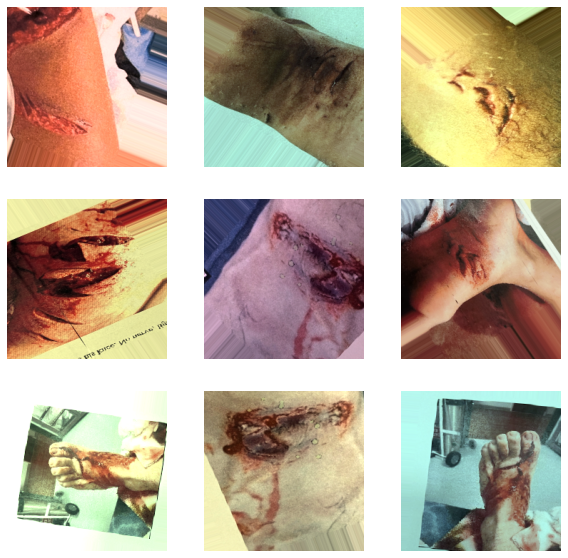

In [6]:
# Note that the images have been loaded with 3 color channels!
class_names = train_images.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")
    print(images[i].shape)

In [7]:
# # Initialize empty lists to store images and labels
# images = []
# labels = []

# # Iterate over the dataset to extract images and labels
# for image_batch, label_batch in train_images:
#     images.append(image_batch.numpy())
#     labels.append(label_batch.numpy())

# # Concatenate the lists of images and labels
# image_array = np.concatenate(images, axis=0)
# label_array = np.concatenate(labels, axis=0)

# print("Images shape:", image_array.shape)  # Output: (88, 224, 224, 3)
# print("Labels shape:", label_array.shape)  # Output: (88, 18)

KeyboardInterrupt: 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)


In [ ]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# def augment_images(image, label):
#     image = datagen.random_transform(image)
#     return image, label
# input_shape = (224, 224, 3)

# augmented_dataset = train_images.map(augment_images)

In [ ]:
# # test script with one image
# img = load_img('./Jaws_labeled_images/Carcharhinidae/IMG_0180_Large.png')
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)
# print(x.shape)

In [ ]:
augmented_images = datagen.flow(image_array)

for i in range(10):
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    plt.imshow(augmented_image.astype('uint8')) # Plot the augmented image
    plt.show()

In [ ]:
# # # Reshape the image to (1, height, width, channels) for the datagen.flow() method
# # image = np.expand_dims(x, axis=0)

# # Generate augmented images indefinitely
# augmented_images = datagen.flow(image_array, label_array)

# x, y = next(augmented_images)
# print(x.shape, y.shape)
# # fig, ax = plt.subplots(nrows=4, ncols=8)
# for i in range(batch_size):
#     image = x[i]
# #     ax.flatten()[i].imshow(np.squeeze(image))
#     plt.imshow(image.astype('uint8'))
#     plt.show()



In [ ]:
augmented_images = datagen.flow(image_array, label_array)

x, y = next(augmented_images)

num_rows = 4
num_cols = 8

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(batch_size):
    row = i // num_cols
    col = i % num_cols
    augmented_image = x[i]
    axes[row, col].imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    axes[row, col].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [ ]:
# Initialize arrays to store generated images and labels
generated_images = []
generated_labels = []


num_batches = 100

for _ in range(num_batches):
    x_batch, y_batch = next(augmented_images)
    generated_images.extend(x_batch)
    generated_labels.extend(y_batch)

# Convert lists to numpy arrays
generated_images = np.array(generated_images)
generated_labels = np.array(generated_labels)

# Verify the shape of generated data
print("Shape of generated images:", generated_images.shape)
print("Shape of generated labels:", generated_labels.shape)

In [ ]:
for i in range(5):
    plt.imshow(generated_images[i].astype('uint8')) # Plot the augmented image
    plt.show()

## CNN on original data

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') 
])

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the training dataset 
train_images = image_dataset_from_directory(
    original_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,  
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear'
)

# Load validation dataset
val_ds = image_dataset_from_directory(
    original_image_dir,
    validation_split=0.2,  
    subset="validation",
    seed=42,  
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',  
    shuffle=True  
)

# Ensure the train_images dataset is suitable for model training
train_images = train_images.prefetch(buffer_size=32)

Found 108 files belonging to 18 classes.
Using 87 files for training.
Found 108 files belonging to 18 classes.
Using 21 files for validation.


In [11]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopper = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history = model.fit(
    train_images,  
    epochs=10,  
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/10


2024-04-21 18:54:50.459976: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2024-04-21 18:54:52.733369: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 17s 1s/step - loss: 464.7202 - accuracy: 0.1264 - val_loss: 215.7121 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 5s 372ms/step - loss: 130.3639 - accuracy: 0.1264 - val_loss: 16.9054 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 4s 578ms/step - loss: 26.1440 - accuracy: 0.2299 - val_loss: 6.7007 - val_accuracy: 0.0476
Epoch 4/10
3/3 [==============================] - 4s 508ms/step - loss: 4.4028 - accuracy: 0.2989 - val_loss: 2.4874 - val_accuracy: 0.2857
Epoch 5/10
3/3 [==============================] - 4s 241ms/step - loss: 1.1617 - accuracy: 0.7701 - val_loss: 2.6861 - val_accuracy: 0.3333
Epoch 6/10
3/3 [==============================] - 5s 563ms/step - loss: 0.6081 - accuracy: 0.8506 - val_loss: 2.7923 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 3s 268ms/step - loss: 0.3319 - accuracy: 0.9195 - val_loss: 3.5243 - val_accuracy: 0.1429
Epoch 8/10
3/3 [=====

In [12]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

1/1 [==============================] - 1s 802ms/step - loss: 2.4874 - accuracy: 0.2857
Validation loss: 2.487356424331665
Validation accuracy: 0.2857142984867096


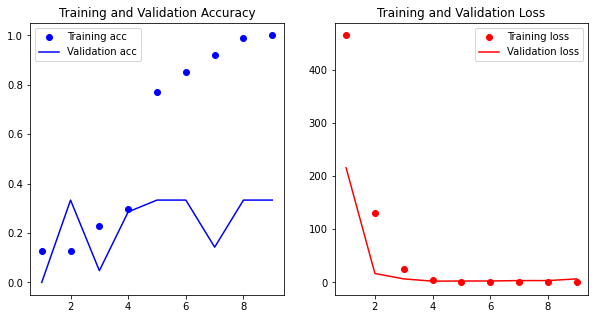

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

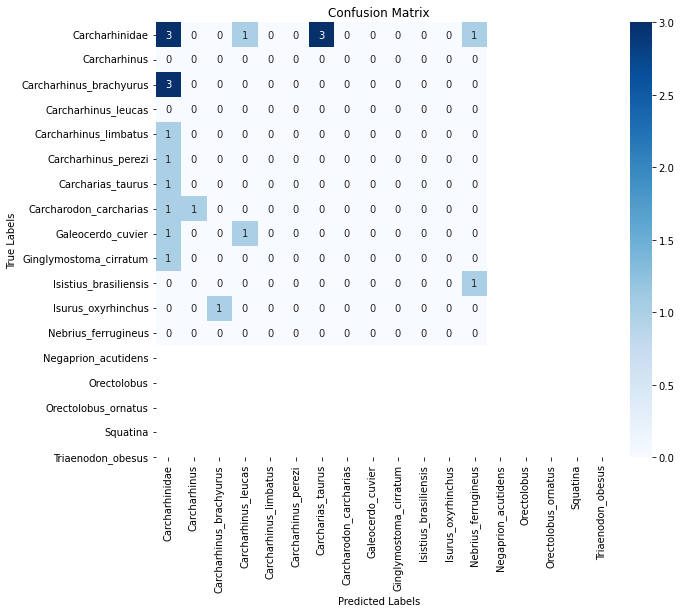

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

val_predictions = model.predict(val_ds)
val_predictions = np.argmax(val_predictions, axis=1)  # Convert probabilities to class indices

# Convert one-hot encoded labels to class indices
true_labels = np.concatenate([y.numpy() for _, y in val_ds])
true_labels = np.argmax(true_labels, axis=1)  # Convert from one-hot to class indices

# Compute the confusion matrix
conf_mat = confusion_matrix(true_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

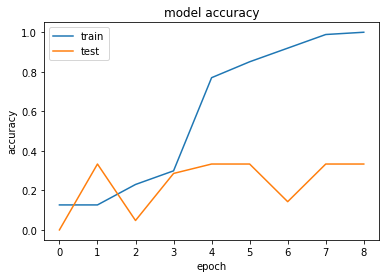

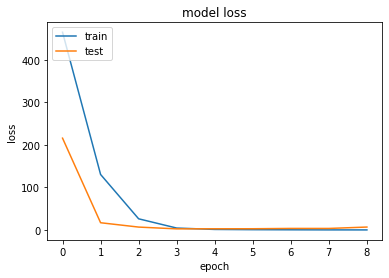

In [15]:
from helpers_plot_history import plot_history
plot_history(history)

## CNN on augmented images 

In [16]:
# Using the same model but augmented images

In [21]:
# Load the training dataset 
train_images = image_dataset_from_directory(
    train_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,  
    shuffle=True,
    seed=42,
    interpolation='bilinear'
)

# Load validation dataset
val_ds = image_dataset_from_directory(
    valid_image_dir,
    seed=42,  
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',  
    shuffle=True  
)

# Ensure the train_images dataset is suitable for model training
train_images = train_images.prefetch(buffer_size=32)

Found 4780 files belonging to 18 classes.
Found 23 files belonging to 18 classes.


In [22]:
# Train the model
history = model.fit(
    train_images,  
    epochs=10,  
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/10
150/150 [==============================] - 51s 323ms/step - loss: 1.5520 - accuracy: 0.6389 - val_loss: 2.1445 - val_accuracy: 0.4348
Epoch 2/10
150/150 [==============================] - 51s 338ms/step - loss: 1.0777 - accuracy: 0.7052 - val_loss: 2.2238 - val_accuracy: 0.4348
Epoch 3/10
150/150 [==============================] - 40s 257ms/step - loss: 0.6488 - accuracy: 0.8029 - val_loss: 2.7598 - val_accuracy: 0.3478
Epoch 4/10
150/150 [==============================] - 42s 271ms/step - loss: 0.3855 - accuracy: 0.8816 - val_loss: 3.5453 - val_accuracy: 0.3043
Epoch 5/10
150/150 [==============================] - 47s 289ms/step - loss: 0.3208 - accuracy: 0.9084 - val_loss: 5.9601 - val_accuracy: 0.3913
Epoch 6/10
150/150 [==============================] - 38s 235ms/step - loss: 0.2306 - accuracy: 0.9389 - val_loss: 5.0762 - val_accuracy: 0.3043


In [23]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

1/1 [==============================] - 1s 898ms/step - loss: 2.1445 - accuracy: 0.4348
Validation loss: 2.144472122192383
Validation accuracy: 0.43478259444236755


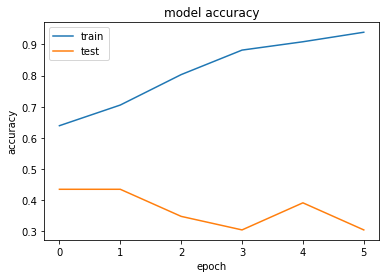

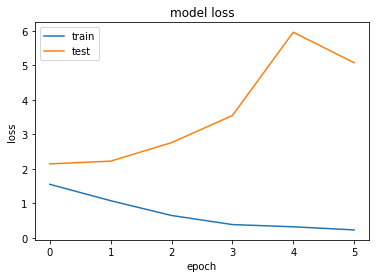

In [24]:
plot_history(history)

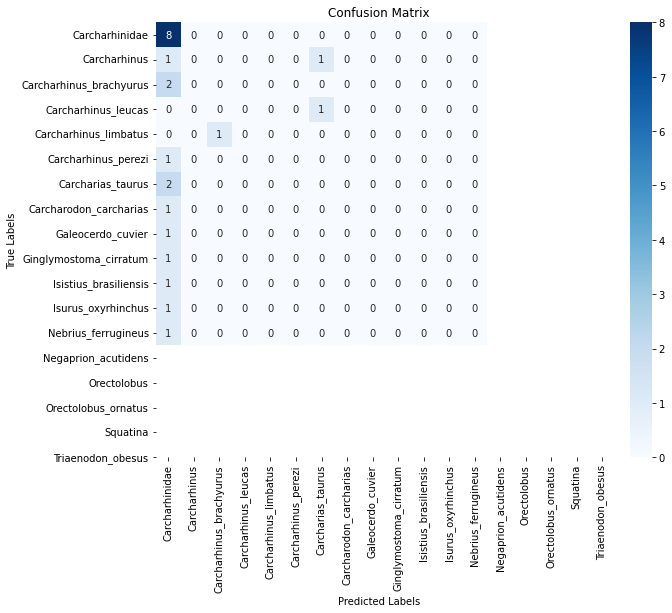

In [25]:
val_predictions = model.predict(val_ds)
val_predictions = np.argmax(val_predictions, axis=1)  # Convert probabilities to class indices

# Convert one-hot encoded labels to class indices
true_labels = np.concatenate([y.numpy() for _, y in val_ds])
true_labels = np.argmax(true_labels, axis=1)  # Convert from one-hot to class indices

# Compute the confusion matrix
conf_mat = confusion_matrix(true_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Transfer Learning on Original Data

### MobileNetV2

In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D


In [27]:
# Load the base MobileNetV2 model with weights pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

In [32]:
# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  
])

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Load and preprocess the data
train_images = image_dataset_from_directory(
    original_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear'
)

val_ds = image_dataset_from_directory(
    original_image_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True
)

# Prefetch data
train_images = train_images.prefetch(buffer_size=32)

Found 108 files belonging to 18 classes.
Using 87 files for training.
Found 108 files belonging to 18 classes.
Using 21 files for validation.


In [37]:
# Early stopping callback
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_images,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/10
3/3 [==============================] - 23s 635ms/step - loss: 3.7526 - accuracy: 0.0575 - val_loss: 2.9524 - val_accuracy: 0.1429
Epoch 2/10
3/3 [==============================] - 3s 494ms/step - loss: 3.0960 - accuracy: 0.1379 - val_loss: 2.6924 - val_accuracy: 0.3810
Epoch 3/10
3/3 [==============================] - 3s 270ms/step - loss: 2.9248 - accuracy: 0.2644 - val_loss: 2.6873 - val_accuracy: 0.3810
Epoch 4/10
3/3 [==============================] - 3s 252ms/step - loss: 2.7880 - accuracy: 0.2759 - val_loss: 2.7372 - val_accuracy: 0.3810
Epoch 5/10
3/3 [==============================] - 3s 244ms/step - loss: 2.6061 - accuracy: 0.3333 - val_loss: 2.7500 - val_accuracy: 0.3810
Epoch 6/10
3/3 [==============================] - 4s 349ms/step - loss: 2.5113 - accuracy: 0.3218 - val_loss: 2.7335 - val_accuracy: 0.3810
Epoch 7/10
3/3 [==============================] - 3s 252ms/step - loss: 2.5156 - accuracy: 0.3103 - val_loss: 2.7339 - val_accuracy: 0.3810
Epoch 8/10
3/3 [===

In [38]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

1/1 [==============================] - 0s 405ms/step - loss: 2.6873 - accuracy: 0.3810
Validation loss: 2.6872591972351074
Validation accuracy: 0.380952388048172


## ResNet50

In [39]:
from tensorflow.keras.applications import ResNet50


In [40]:
# Load the base ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

In [41]:
# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  
])

In [42]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Load and preprocess the data
train_images = image_dataset_from_directory(
    original_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear'
)

val_ds = image_dataset_from_directory(
    original_image_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True
)

# Prefetch data
train_images = train_images.prefetch(buffer_size=32)

Found 108 files belonging to 18 classes.
Using 87 files for training.
Found 108 files belonging to 18 classes.
Using 21 files for validation.


In [44]:
# Train the model
history = model.fit(
    train_images,
    epochs=20,
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/20
3/3 [==============================] - 6s 917ms/step - loss: 3.7300 - accuracy: 0.0805 - val_loss: 2.3431 - val_accuracy: 0.2857
Epoch 2/20
3/3 [==============================] - 3s 268ms/step - loss: 2.8278 - accuracy: 0.2759 - val_loss: 2.4045 - val_accuracy: 0.3810
Epoch 3/20
3/3 [==============================] - 4s 258ms/step - loss: 2.4861 - accuracy: 0.3793 - val_loss: 2.5390 - val_accuracy: 0.3810
Epoch 4/20
3/3 [==============================] - 4s 259ms/step - loss: 2.2446 - accuracy: 0.3563 - val_loss: 2.5667 - val_accuracy: 0.3810
Epoch 5/20
3/3 [==============================] - 4s 303ms/step - loss: 1.9998 - accuracy: 0.3908 - val_loss: 2.5676 - val_accuracy: 0.3810
Epoch 6/20
3/3 [==============================] - 4s 470ms/step - loss: 1.8949 - accuracy: 0.4023 - val_loss: 2.5760 - val_accuracy: 0.3810


In [45]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

1/1 [==============================] - 0s 430ms/step - loss: 2.3431 - accuracy: 0.2857
Validation loss: 2.343076705932617
Validation accuracy: 0.2857142984867096


## VGG16

In [46]:
from tensorflow.keras.applications import VGG16


In [47]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

In [48]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Replace num_classes with your actual number of classes
])

In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Load and preprocess the data
train_images = image_dataset_from_directory(
    original_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear'
)

val_ds = image_dataset_from_directory(
    original_image_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True
)

# Prefetch data
train_images = train_images.prefetch(buffer_size=32)

Found 108 files belonging to 18 classes.
Using 87 files for training.
Found 108 files belonging to 18 classes.
Using 21 files for validation.


In [51]:
history = model.fit(
    train_images,
    epochs=20,
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 12.7965 - accuracy: 0.0575 - val_loss: 5.9613 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 4s 430ms/step - loss: 10.9815 - accuracy: 0.0690 - val_loss: 4.6325 - val_accuracy: 0.0952
Epoch 3/20
3/3 [==============================] - 2s 257ms/step - loss: 9.2901 - accuracy: 0.0690 - val_loss: 4.5109 - val_accuracy: 0.3810
Epoch 4/20
3/3 [==============================] - 2s 241ms/step - loss: 8.6550 - accuracy: 0.1724 - val_loss: 4.8932 - val_accuracy: 0.3810
Epoch 5/20
3/3 [==============================] - 3s 249ms/step - loss: 7.7653 - accuracy: 0.1609 - val_loss: 5.0917 - val_accuracy: 0.3810
Epoch 6/20
3/3 [==============================] - 3s 476ms/step - loss: 6.0346 - accuracy: 0.3218 - val_loss: 5.0240 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 4s 902ms/step - loss: 6.6665 - accuracy: 0.2069 - val_loss: 4.9199 - val_accuracy: 0.3333
Epoch 8/20
3/3 [=

In [52]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

1/1 [==============================] - 1s 538ms/step - loss: 4.5109 - accuracy: 0.3810
Validation loss: 4.510915279388428
Validation accuracy: 0.380952388048172


In [ ]:
# ********************

## Transfer Learning on augmented data

### MobileNetV2

In [53]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D


In [54]:
# Load the base MobileNetV2 model with weights pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

In [56]:
# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  
])

In [57]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
# Load the training dataset 
train_images = image_dataset_from_directory(
    train_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,  
    shuffle=True,
    seed=42,
    interpolation='bilinear'
)

# Load validation dataset
val_ds = image_dataset_from_directory(
    valid_image_dir,
    seed=42,  
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',  
    shuffle=True  
)

# Ensure the train_images dataset is suitable for model training
train_images = train_images.prefetch(buffer_size=32)

Found 4780 files belonging to 18 classes.
Found 23 files belonging to 18 classes.


In [59]:
# Early stopping callback
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_images,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/10
150/150 [==============================] - 58s 333ms/step - loss: 1.7012 - accuracy: 0.6224 - val_loss: 2.6852 - val_accuracy: 0.3478
Epoch 2/10
150/150 [==============================] - 53s 350ms/step - loss: 1.4702 - accuracy: 0.6487 - val_loss: 2.5865 - val_accuracy: 0.3478
Epoch 3/10
150/150 [==============================] - 45s 298ms/step - loss: 1.3916 - accuracy: 0.6544 - val_loss: 2.6833 - val_accuracy: 0.3478
Epoch 4/10
150/150 [==============================] - 31s 189ms/step - loss: 1.3231 - accuracy: 0.6579 - val_loss: 2.6537 - val_accuracy: 0.3478
Epoch 5/10
150/150 [==============================] - 46s 295ms/step - loss: 1.2748 - accuracy: 0.6651 - val_loss: 2.7538 - val_accuracy: 0.3478
Epoch 6/10
150/150 [==============================] - 34s 206ms/step - loss: 1.2319 - accuracy: 0.6688 - val_loss: 2.6800 - val_accuracy: 0.3478
Epoch 7/10
150/150 [==============================] - 26s 167ms/step - loss: 1.1804 - accuracy: 0.6782 - val_loss: 2.6447 - val_ac

In [60]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

1/1 [==============================] - 0s 478ms/step - loss: 2.5865 - accuracy: 0.3478
Validation loss: 2.5864641666412354
Validation accuracy: 0.3478260934352875


## ResNet50

In [61]:
from tensorflow.keras.applications import ResNet50


In [62]:
# Load the base ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

In [63]:
# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  
])

In [64]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
# Load the training dataset 
train_images = image_dataset_from_directory(
    train_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,  
    shuffle=True,
    seed=42,
    interpolation='bilinear'
)

# Load validation dataset
val_ds = image_dataset_from_directory(
    valid_image_dir,
    seed=42,  
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',  
    shuffle=True  
)

# Ensure the train_images dataset is suitable for model training
train_images = train_images.prefetch(buffer_size=32)

Found 4780 files belonging to 18 classes.
Found 23 files belonging to 18 classes.


In [66]:
# Train the model
history = model.fit(
    train_images,
    epochs=20,
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/20
150/150 [==============================] - 42s 265ms/step - loss: 1.4222 - accuracy: 0.6529 - val_loss: 2.4907 - val_accuracy: 0.4348
Epoch 2/20
150/150 [==============================] - 50s 325ms/step - loss: 0.7747 - accuracy: 0.7715 - val_loss: 2.5043 - val_accuracy: 0.3478
Epoch 3/20
150/150 [==============================] - 52s 325ms/step - loss: 0.5003 - accuracy: 0.8490 - val_loss: 2.7698 - val_accuracy: 0.3478
Epoch 4/20
150/150 [==============================] - 44s 286ms/step - loss: 0.3421 - accuracy: 0.8979 - val_loss: 2.8285 - val_accuracy: 0.3913
Epoch 5/20
150/150 [==============================] - 43s 281ms/step - loss: 0.2404 - accuracy: 0.9341 - val_loss: 2.8270 - val_accuracy: 0.3913
Epoch 6/20
150/150 [==============================] - 42s 249ms/step - loss: 0.1862 - accuracy: 0.9490 - val_loss: 2.9339 - val_accuracy: 0.3913


In [67]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

1/1 [==============================] - 0s 473ms/step - loss: 2.4907 - accuracy: 0.4348
Validation loss: 2.490715265274048
Validation accuracy: 0.43478259444236755


## VGG16

In [68]:
from tensorflow.keras.applications import VGG16


In [69]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

In [70]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Replace num_classes with your actual number of classes
])

In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
# Load the training dataset 
train_images = image_dataset_from_directory(
    train_image_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=batch_size,  
    shuffle=True,
    seed=42,
    interpolation='bilinear'
)

# Load validation dataset
val_ds = image_dataset_from_directory(
    valid_image_dir,
    seed=42,  
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical',  
    shuffle=True  
)

# Ensure the train_images dataset is suitable for model training
train_images = train_images.prefetch(buffer_size=32)

Found 4780 files belonging to 18 classes.
Found 23 files belonging to 18 classes.


In [ ]:
history = model.fit(
    train_images,
    epochs=20,
    validation_data=val_ds,
    callbacks=[early_stopper]
)

Epoch 1/20
150/150 [==============================] - 46s 292ms/step - loss: 4.4887 - accuracy: 0.4665 - val_loss: 5.8783 - val_accuracy: 0.3913
Epoch 2/20
102/150 [===================>..........] - ETA: 14s - loss: 2.2147 - accuracy: 0.5729

In [ ]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

## Unsupervised learning

In [ ]:
from tensorflow.keras.layers import UpSampling2D, Input, Conv2DTranspose
from tensorflow.keras.models import Model


In [ ]:
# Define the encoder part of the autoencoder
input_img = Input(shape=(224, 224, 3))  # Adapt this if using `channels_first` image data format

In [ ]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Define the decoder part of the autoencoder
x = Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Load your data
train_images = image_dataset_from_directory(
    original_image_dir,
    label_mode=None,  # No labels needed as this is unsupervised
    color_mode='rgb',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

In [ ]:
# Normalize images to [0, 1] to match the sigmoid activation in the decoder output
normalized_images = train_images.map(lambda x: (x / 255.0, x / 255.0))  # Set x as both input and target
normalized_images = normalized_images.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Train the autoencoder
history = autoencoder.fit(
    normalized_images,
    epochs=50,
    batch_size=batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)],
)

In [ ]:
val_loss = autoencoder.evaluate(normalized_images)
print("Validation Loss:", val_loss)

## Toy model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


# CNNs are more concise and have fewer parameteres than dense layers

In [ ]:
# Fit the generator on the training data
datagen.fit(image_array)

# Compile the new model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping


early_stopper = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history = model.fit(
    train_images,  
    epochs=10,  
    validation_data=valid_images,
    verbose=1,
    callbacks=[early_stopper]
)

In [ ]:
from helpers_plot_history import plot_history
plot_history(history)

In [ ]:
history= model.fit(augmented_images,
          epochs=20,
#          steps_per_epoch=4,
          validation_data=valid_images)

# Below are test scripts

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
image = np.random.random((224, 224, 3))

# Reshape the image to (1, height, width, channels) for the datagen.flow() method
image = np.expand_dims(image, axis=0)

# Generate augmented images indefinitely
augmented_images = datagen.flow(image)

# Specify how many augmented images you want to generate
num_images_to_generate = 5

# Generate and plot the specified number of augmented images
for i in range(num_images_to_generate):
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    plt.imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
image = np.random.random((224, 224, 3))

# Reshape the image to (1, height, width, channels) for the datagen.flow() method
image = np.expand_dims(image, axis=0)

# Generate augmented images indefinitely
augmented_images = datagen.flow(image)

# Generate and plot 32 augmented images in an 8x4 grid plot
num_images_to_generate = 32
num_rows = 8
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

for i in range(num_images_to_generate):
    row = i // num_cols
    col = i % num_cols
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    axes[row, col].imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    axes[row, col].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()
